In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper')

# Topic modeling

In [3]:
import string
BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'

def simple_preproc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

with open(BASE_PATH + 'text_news_nne/text_news_2016.txt') as read_file:
  sentences2016 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2017.txt') as read_file:
  sentences2017 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2018.txt') as read_file:
  sentences2018 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2019.txt') as read_file:
  sentences2019 = [simple_preproc(k).lower().split() for k in read_file.readlines()]

sentences1619 = sentences2016 + sentences2017 + sentences2018 + sentences2019

In [4]:
# deleted <p> that indicate the start of a paragraph

for i in (range(len(sentences1619))):
  count = sentences1619[i].count('p')
  if(count > 0):
    for j in range(count):
      sentences1619[i].remove('p')
      # print(i)
  else:
    sentences1619[i]

# deleted <h> that indicate the header

for i in (range(len(sentences1619))):
  count = sentences1619[i].count('h')
  if(count > 0):
    for j in range(count):
      sentences1619[i].remove('h')
      # print(i)
  else:
    sentences1619[i]

# deleted s

for i in (range(len(sentences1619))):
  count = sentences1619[i].count('s')
  if(count > 0):
    for j in range(count):
      sentences1619[i].remove('s')
      # print(i)
  else:
    sentences1619[i]


# deleted 's

for i in (range(len(sentences1619))):
  count = sentences1619[i].count('\'s')
  if(count > 0):
    for j in range(count):
      sentences1619[i].remove('\'s')
      # print(i)
  else:
    sentences1619[i]


# deleted 'nt

for i in (range(len(sentences1619))):
  count = sentences1619[i].count('nt')
  if(count > 0):
    for j in range(count):
      sentences1619[i].remove('nt')
      # print(i)
  else:
    sentences1619[i]

In [5]:
import spacy
sp = spacy.load('en_core_web_sm')

all_stopwords = set(sp.Defaults.stop_words)
stop_word = sentences1619.copy()
important_words = stop_word.copy()
for i in (range(len(stop_word))):
  stop_word[i] = [i for i in sentences1619[i] if str(i).lower() not in all_stopwords]
  important_words[i] = [i for i in stop_word[i] if i.isalpha()]

In [6]:
# create a new list called my_new_list
my_new_list = []
# iterate over the outer list
for sub_list in important_words:
# go over each item of the sublist
    for item in sub_list:
# append it to our new list
        my_new_list.append(item)


lista_vuota = ['1']
nuova_lista = []
nuova_lista.append(lista_vuota)
nuova_lista.append(my_new_list)

In [7]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(nuova_lista)

# Create Corpus
texts = nuova_lista.copy()

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [8]:
from pprint import pprint
import gensim

# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.014*"said" + 0.004*"new" + 0.004*"state" + 0.004*"year" + 0.003*"trump" + '
  '0.003*"years" + 0.003*"time" + 0.003*"police" + 0.003*"people" + '
  '0.002*"city"'),
 (1,
  '0.015*"said" + 0.003*"like" + 0.003*"new" + 0.003*"time" + 0.003*"trump" + '
  '0.003*"state" + 0.003*"people" + 0.003*"police" + 0.003*"year" + '
  '0.003*"years"'),
 (2,
  '0.017*"said" + 0.004*"new" + 0.003*"state" + 0.003*"time" + 0.003*"people" '
  '+ 0.003*"police" + 0.003*"year" + 0.002*"like" + 0.002*"city" + '
  '0.002*"game"'),
 (3,
  '0.011*"said" + 0.004*"years" + 0.004*"state" + 0.003*"people" + 0.003*"new" '
  '+ 0.003*"year" + 0.003*"police" + 0.002*"trump" + 0.002*"time" + '
  '0.002*"home"'),
 (4,
  '0.017*"said" + 0.004*"people" + 0.003*"new" + 0.003*"police" + '
  '0.003*"years" + 0.002*"year" + 0.002*"like" + 0.002*"time" + 0.002*"trump" '
  '+ 0.002*"state"'),
 (5,
  '0.015*"said" + 0.004*"state" + 0.004*"new" + 0.004*"time" + 0.003*"like" + '
  '0.003*"school" + 0.003*"year" + 0.003*"

# PRE-PROCESSING

## Selection of articles that contain at least one keyword

In [9]:
!pip install -U word_forms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 166 kB 5.3 MB/s 
  Attempting uninstall: inflect
    Found existing installation: inflect 2.1.0
    Uninstalling inflect-2.1.0:
      Successfully uninstalled inflect-2.1.0


In [10]:
from word_forms.word_forms import get_word_forms
import nltk
nltk.download('omw-1.4')

# generate all possible forms of keywords
# keyword_list = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'attack', 'hijack', 'firefighter', 'airplane', 'terrorism', 'afghanistan', 'jihad', 'islam']
word_form_tower = get_word_forms("tower")
word_form_attack = get_word_forms("attack")
word_form_hijack = get_word_forms("hijack")
word_form_firefighter = get_word_forms("firefighter")
word_form_airplane = get_word_forms("airplane")
word_form_terrorism = get_word_forms("terrorism")


word_form_tot = (list(list(word_form_tower['a']) + list(word_form_tower['n']) + 
list(word_form_tower['v']) + list(word_form_tower['r']) + 
list(word_form_attack['a']) + list(word_form_attack['n']) + 
list(word_form_attack['v']) + list(word_form_attack['r']) + 
list(word_form_airplane['a']) + list(word_form_airplane['n']) + 
list(word_form_airplane['v']) + list(word_form_airplane['r']) + 
list(word_form_hijack['a']) + list(word_form_hijack['n']) + 
list(word_form_hijack['v']) + list(word_form_hijack['r']) + 
list(word_form_firefighter['a']) + list(word_form_firefighter['n']) + 
list(word_form_firefighter['v']) + list(word_form_firefighter['r']) + 
list(word_form_terrorism['a']) + list(word_form_terrorism['n']) + 
list(word_form_terrorism['v']) + list(word_form_terrorism['r'])))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
# word_form_tot

In [12]:
# import string
import re

BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'


with open(BASE_PATH + 'text_news_nne/text_news_2016.txt') as read_file1:
  sentences2016 = read_file1.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2017.txt') as read_file2:
  sentences2017 = read_file2.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2018.txt') as read_file3:
  sentences2018 = read_file3.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2019.txt') as read_file4:
  sentences2019 = read_file4.readlines()

sentences1619 = sentences2016 + sentences2017 + sentences2018 + sentences2019

  
#define the list of words of our interest
keywords = ['bin laden', 'al qaeda', 'twin towers', 'world trade center', 'afghanistan', 'jihad', 'islam'] #aggiungere twin towers

keyword_list = keywords + word_form_tot

#define the dictionary where we store the articles
articles = {}
art = {}
#remove the p that represent in html the start of the paragraph
for symbol in sentences1619:
  symbol = symbol.replace('<p>', '').replace('<h>', '')
  #selection of articles that contain the keywords
  for keyword in keyword_list:
    if (keyword in symbol.lower()):
      #select id of the article that contains at least one kwyword 
      id = re.findall(r'@@(\w+)', symbol)[0]
      articles[id] = symbol.lower()
      art[id] = symbol.lower()

print(len(articles))

8703


In [13]:
#check if list of articles contains duplicates by their id

def check_duplicate(l):
    mySet = set(l)
    if len(mySet) == len(l):
        print("List has no duplicate elements.")
    else:
        print("The list contains duplicate elements")

check_duplicate(articles.keys())

List has no duplicate elements.


## Tokenization & stop-word removal

Dictionary for every article that contains the keywords

In [14]:
import spacy
import nltk
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

for id in articles:
  #tokenization
  token_sentences1619 = articles[id].split()

  #stop-word removal
  stop_word = [i for i in token_sentences1619 if str(i).lower() not in all_stopwords]
  words = [i for i in stop_word if i.isalpha()]

  #save the list of words in the dictionary
  articles[id] = words

In [15]:
# creazione dizionari con conteggio unigrammi e bigrammi degli articoli
unigram_dict = {}
bigram_dict = {}

for id in articles:
  for i in range(len(articles[id])):
    unigram = articles[id][i]
    if unigram not in unigram_dict.keys():
      unigram_dict[unigram] = 1
    else:
      unigram_dict[unigram] = unigram_dict[unigram] + 1
  for i in range(len(articles[id])-1):
    bigram = articles[id][i] + ' ' + articles[id][i+1]
    if bigram not in bigram_dict.keys():
      bigram_dict[bigram] = 1
    else:
      bigram_dict[bigram] = bigram_dict[bigram] + 1

# GEEKS FOR GEEKS

# def prepare_data_for_training(sentences,w2v):
#     data = {}
#     for sentence in sentences:
#         for word in sentence:
#             if word not in data:
#                 data[word] = 1
#             else:
#                 data[word] += 1

In [16]:
bigram_dict_value = {}
discount_factor = 6

for bigram in bigram_dict:
  unigram_number = []
  words_list = bigram.split()
  bigram_number = bigram_dict[bigram]
  
  for word in words_list:
    unigram_count = unigram_dict[word]
    unigram_number.append(unigram_count)
  
  try:
    score = (bigram_number-discount_factor)/((unigram_number[0]-bigram_number)*(unigram_number[1]-bigram_number))
  except ZeroDivisionError:
    score = 0
  
  bigram_dict_value[bigram] = score

In [17]:
threshold = 1
word_phrases_dict = {b: val for b, val in bigram_dict_value.items() if val >= threshold}

In [18]:
# word_phrases_dict

In [19]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

cont = 0
support_dict = {}

for id in art:
  #tokenization
  token_sentences1619_art = art[id].split()

  #stop-word removal
  stop_word_art = [i for i in token_sentences1619_art if str(i).lower() not in all_stopwords]
  words_art = [i for i in stop_word_art if i.isalpha() or i == "."]
  
  art[id] = words_art

  # bigrams = list(nltk.ngrams(words_art,2))
  # trigrams = list(nltk.ngrams(words_art,3))
  # n_most_common = 0 #how many of the most common n-grams do you want, zero indicates only the user_grams.
  # fdist_bigrams = nltk.FreqDist(bigrams).most_common(n_most_common) #n most common bigrams
  # fdist_trigrams = nltk.FreqDist(trigrams).most_common(n_most_common) #n most common trigrams
  # fdist_bigrams=[x[0][0]+' '+x[0][1] for x in fdist_bigrams]
  # fdist_trigrams=[x[0][0]+' '+x[0][1]+' '+x[0][2] for x in fdist_trigrams]
  # n_grams=fdist_bigrams
  # n_grams.extend(fdist_trigrams)

  user_grams = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'white house', 'president bush', 'bay area']

  i=0
  support_dict[id] = []
  #check if 
  # - word in position i + space + word in position i+1 + space + word in position i+2 is a word in user_grams (world trade center)
  # - word in position i + space + word in position i+1 + space is a word in user_grams (ex. bin + ' ' + laden)
  # and create a unique term in the vocabulary (ex. bin-laden)
  # otherwise leave the single word 
  while i < len(art[id])-1:
    try:
      if (art[id][i] + ' ' + art[id][i+1] + ' ' + art[id][i+2] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1] + '-' + art[id][i+2])
        i = i + 3
      elif(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
    except:
      if(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
      pass
    # print(i, 'out of', len(art[id]))

# just to know how many articles have been checked
  cont = cont + 1
  print(cont)

Output streaming troncato alle ultime 5000 righe.
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893


In [20]:
# def save_dict_to_file(dic):
#     f = open('dict0206.txt','w')
#     f.write(str(dic))
#     f.close()

# save_dict_to_file(support_dict)

In [21]:
# def load_dict_from_file():
#     f = open('dict0206.txt','r')
#     data=f.read()
#     f.close()
#     return eval(data)

# dictionary0206 = load_dict_from_file()

In [22]:
def splitt(sequence, sep):
    chunk = []
    for val in sequence:
        if val == sep:
            yield chunk
            chunk = []
        else:
            chunk.append(val)
    yield chunk

In [23]:
#creation of list of sentences that will be passed to Word2Vec

listWord2Vec = []
for id in support_dict:
  res = splitt(support_dict[id], '.')
  for x in res:
    listWord2Vec.append(x)
  # listWord2Vec.remove([])

print(len(listWord2Vec))

360220


In [24]:
listWord2Vec

[['condition',
  'improves',
  'queen',
  'anne',
  'county',
  'sheriff',
  'deputy',
  'injured',
  'exchange',
  'gunfire',
  'man',
  'killed',
  'eastern',
  'shore',
  'deputy',
  'injured',
  'chestertown',
  'shooting',
  'man',
  'killed',
  'queen',
  'anne',
  'county',
  'sheriff',
  'deputy',
  'critically',
  'injured',
  'early',
  'thursday',
  'exchange',
  'gunfire',
  'domestic',
  'dispute',
  'chestertown',
  'maryland',
  'eastern',
  'shore',
  'authorities',
  'said'],
 ['man',
  'killed',
  'queen',
  'anne',
  'county',
  'sheriff',
  'deputy',
  'critically',
  'injured',
  'early',
  'thursday',
  'exchange',
  'gunfire',
  'domestic',
  'dispute',
  'chestertown',
  'maryland',
  'eastern',
  'shore',
  'authorities',
  'said'],
 ['condition',
  'queen',
  'anne',
  'county',
  'sheriff',
  'deputy',
  'shot',
  'chestertown',
  'thursday',
  'improved',
  'police',
  'department',
  'said',
  'friday'],
 ['sheriff',
  'deputy',
  'warren',
  'scott',
  'ho

## Lemmatization --- NON FATTA

In [1]:
# we don't do this

# nlp = spacy.load('en_core_web_sm') #, disable=['parser', 'ner']


# doc = listWord2Vec.copy()
# lemma_list = listWord2Vec.copy()
# for i in range(len(listWord2Vec)):
#   doc[i] = nlp(str(listWord2Vec[i]))
#   lemma_list[i] = list([token.lemma_ for token in doc[i] if (not token.is_punct)])

# WORD2VEC

## Model

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(listWord2Vec, min_count=15, size=300, sg=1, iter=5)

# model.save('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/word2vec-1619.model')

# model.train(listWord2Vec, total_examples=100000, epochs=30, report_delay=1)
# vocabulary = list(model.wv.vocab)

## Most similar to

In [ ]:
model.wv.most_similar("al-qaeda")

[('militias', 0.9192647933959961),
 ('insurgents', 0.905670166015625),
 ('houthis', 0.898454487323761),
 ('nusra', 0.8945210576057434),
 ('shiite', 0.888206422328949),
 ('isil', 0.8826096653938293),
 ('separatists', 0.880626916885376),
 ('libyan', 0.8794610500335693),
 ('insurgency', 0.879420280456543),
 ('yemeni', 0.877305805683136)]

In [ ]:
model.wv.most_similar("bin-laden")

[('osama', 0.9628983736038208),
 ('mansoor', 0.8811023831367493),
 ('saddam', 0.855925440788269),
 ('mullah', 0.8293054103851318),
 ('kuwait', 0.8283265829086304),
 ('houthis', 0.8230298757553101),
 ('mastermind', 0.8158438205718994),
 ('captives', 0.8127792477607727),
 ('tayyip', 0.8122520446777344),
 ('airstrike', 0.8109457492828369)]

In [ ]:
model.wv.most_similar("airplane")

[('aircraft', 0.7532824873924255),
 ('carrier', 0.7162911295890808),
 ('jet', 0.7049762010574341),
 ('plane', 0.7038610577583313),
 ('hangar', 0.7015485763549805),
 ('takeoff', 0.6938161253929138),
 ('flies', 0.6853494048118591),
 ('spacecraft', 0.6823474168777466),
 ('simulator', 0.6799079179763794),
 ('aboard', 0.6792775988578796)]

In [ ]:
# model.wv.most_similar("twin-towers")

In [ ]:
model.wv.most_similar("tower")

[('towers', 0.6457250714302063),
 ('eiffel', 0.6359206438064575),
 ('penthouse', 0.627417802810669),
 ('condominium', 0.5974063873291016),
 ('skyscraper', 0.5877477526664734),
 ('manila', 0.573283314704895),
 ('elevators', 0.5638302564620972),
 ('atrium', 0.5552619695663452),
 ('skyscrapers', 0.5483666062355042),
 ('hyatt', 0.5475381016731262)]

In [ ]:
model.wv.most_similar("terrorism")

[('extremism', 0.7193844318389893),
 ('atrocities', 0.6944065093994141),
 ('discredited', 0.690919041633606),
 ('terrorists', 0.6891947984695435),
 ('terror', 0.6810086965560913),
 ('gulen', 0.6798667907714844),
 ('perpetrated', 0.6786746382713318),
 ('pretext', 0.6737489104270935),
 ('separatists', 0.6729879975318909),
 ('turks', 0.6723886728286743)]

In [ ]:
model.wv.most_similar("world-trade-center")

[('nairobi', 0.7646068334579468),
 ('airliner', 0.7621952295303345),
 ('ataturk', 0.7493358850479126),
 ('bangkok', 0.7489733695983887),
 ('kyoto', 0.7371076345443726),
 ('ramblas', 0.7307813763618469),
 ('docked', 0.7253932952880859),
 ('hasan', 0.7216545343399048),
 ('ababa', 0.719365119934082),
 ('istanbul', 0.7156572937965393)]

In [ ]:
model.wv.most_similar("attack")

[('attacks', 0.6074608564376831),
 ('attacked', 0.5507950782775879),
 ('incident', 0.49152541160583496),
 ('bombing', 0.4719719886779785),
 ('airstrike', 0.47081708908081055),
 ('ambush', 0.4672524034976959),
 ('abouyaaqoub', 0.4610297977924347),
 ('carnage', 0.4603308439254761),
 ('gruesome', 0.4595646560192108),
 ('rampage', 0.45875346660614014)]

In [ ]:
model.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('ataturk', 0.8128867149353027),
 ('airliner', 0.7890700101852417),
 ('blasts', 0.7866783142089844),
 ('warplanes', 0.7793536186218262),
 ('airstrike', 0.7780120372772217),
 ('hijackers', 0.769393801689148),
 ('detonated', 0.7677232027053833),
 ('houthis', 0.767091691493988),
 ('burma', 0.7611801624298096),
 ('salvini', 0.7608454823493958)]

In [ ]:
model.wv.most_similar("firefighter")

[('rodeman', 0.7343468070030212),
 ('battalion', 0.7179279923439026),
 ('firemen', 0.695227324962616),
 ('diver', 0.6911121606826782),
 ('jarrettsville', 0.6899574995040894),
 ('sailor', 0.6857651472091675),
 ('sergeant', 0.6851717233657837),
 ('costin', 0.6816835403442383),
 ('daly', 0.6744981408119202),
 ('firefighters', 0.6590029001235962)]

In [ ]:
model.wv.most_similar("afghanistan")

[('iraq', 0.8012048006057739),
 ('kuwait', 0.7333192825317383),
 ('allied', 0.7258208990097046),
 ('afghan', 0.7253676652908325),
 ('taliban', 0.7247727513313293),
 ('deployments', 0.7194067239761353),
 ('insurgents', 0.7162002325057983),
 ('airmen', 0.706549882888794),
 ('generals', 0.7054136991500854),
 ('yemen', 0.702724039554596)]

In [ ]:
model.wv.most_similar("islam")

[('christianity', 0.821970522403717),
 ('homosexuality', 0.7943038940429688),
 ('prophet', 0.7895351052284241),
 ('proclaim', 0.7862355709075928),
 ('teachings', 0.7850155234336853),
 ('jew', 0.773750901222229),
 ('farrakhan', 0.7736724615097046),
 ('secular', 0.7715421915054321),
 ('persecution', 0.7661778330802917),
 ('feminists', 0.7659317255020142)]

In [ ]:
model.wv.most_similar("jihad")

[('shiite', 0.876291036605835),
 ('jihadists', 0.86533522605896),
 ('islamist', 0.8584394454956055),
 ('nusra', 0.8543674945831299),
 ('sunni', 0.8497276306152344),
 ('turks', 0.8480215072631836),
 ('egyptians', 0.8454305529594421),
 ('arabs', 0.843468189239502),
 ('kurds', 0.8433516025543213),
 ('hezbollah', 0.8404883146286011)]

## Corrispondence

In [ ]:
# from gensim.models.word2vec import Word2Vec

# e_0206 = model # Word2Vec.load("word2vec-post2001.model") 
# e_1619 = Word2Vec.load("word2vec-1619.model")

In [ ]:
# e_0206.wv.most_similar(positive=[e_1619["firefighter"]])

In [ ]:
# e_1619.wv.most_similar(positive=[e_0206["terrorism"]])

## Similarity

In [ ]:
# model.wv.similarity("airplane", 'twin-towers')

In [ ]:
model.wv.similarity("airplane", 'hijacked')

0.42136258

In [ ]:
model.wv.similarity("attack", 'world-trade-center')

0.3303223

In [ ]:
model.wv.similarity("firefighter", 'terrorist')

0.18717661

In [ ]:
model.wv.similarity("airplane", 'copyright')

0.29261106

In [ ]:
model.wv.similarity("al-qaeda", 'terrorists')

0.72967494

## Odd one out

In [ ]:
model.wv.doesnt_match(['bin-laden', 'pizza', 'al-qaeda'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'pizza'

## boh --- analogies difference ma boh

In [ ]:
model.wv.most_similar(positive=["president-bush", "al-qaeda"], negative=["white-house"], topn=10)

[('jihadists', 0.7755362391471863),
 ('acronym', 0.7663289904594421),
 ('outlawed', 0.7643799781799316),
 ('isil', 0.7636378407478333),
 ('jihad', 0.758487343788147),
 ('shiite', 0.7574697732925415),
 ('dissident', 0.7544910311698914),
 ('nusra', 0.7534268498420715),
 ('separatists', 0.7530385255813599),
 ('gulen', 0.7529911398887634)]

## 10 most similar vs other

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

### Al-qaeda

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


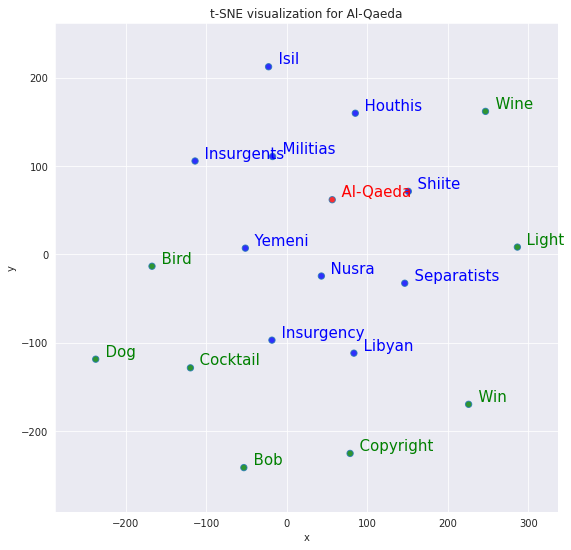

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'al-qaeda', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


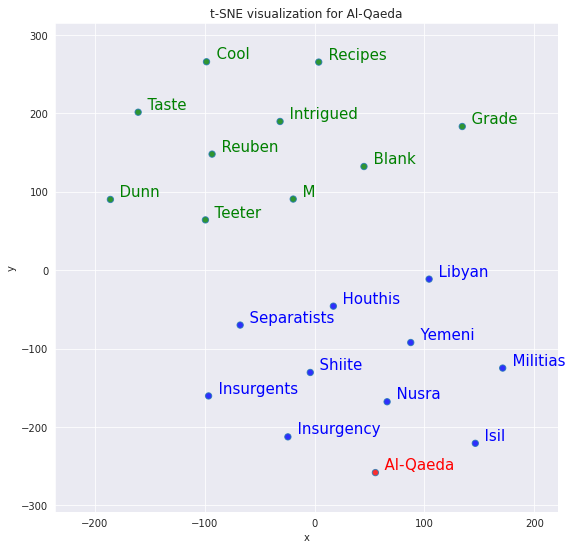

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'al-qaeda', [i[0] for i in model.wv.most_similar(negative=["al-qaeda"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "al-qaeda", [t[0] for t in model.wv.most_similar(positive=["al-qaeda"], topn=20)][10:])

### Bin-Laden

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


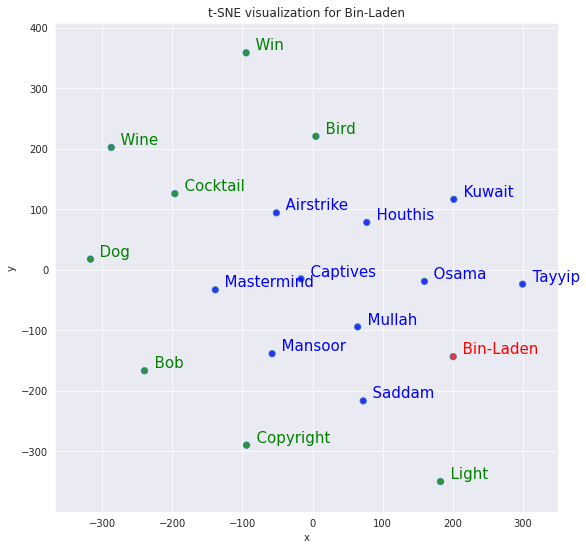

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'bin-laden', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


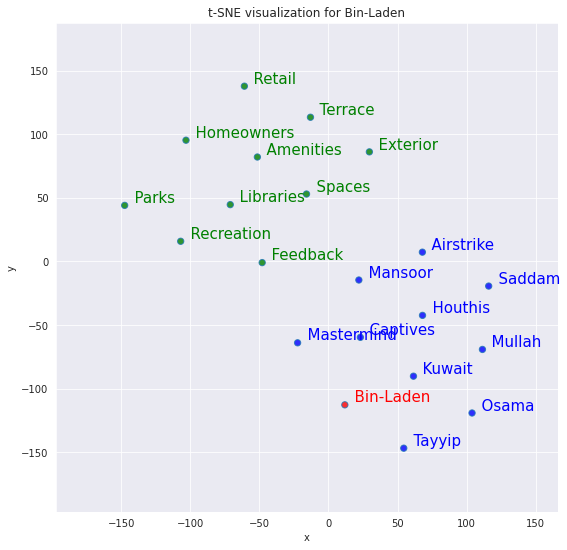

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'bin-laden', [i[0] for i in model.wv.most_similar(negative=["bin-laden"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "bin-laden", [t[0] for t in model.wv.most_similar(positive=["bin-laden"], topn=20)][10:])

### Twin-towers

In [ ]:
# 10 most similar vs 8 random
# tsnescatterplot(model, 'twin-towers', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

In [ ]:
# 10 most similar vs 10 most dissimilar
# tsnescatterplot(model, 'twin-towers', [i[0] for i in model.wv.most_similar(negative=["twin-towers"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "twin-towers", [t[0] for t in model.wv.most_similar(positive=["twin-towers"], topn=20)][10:])

### Airplane

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


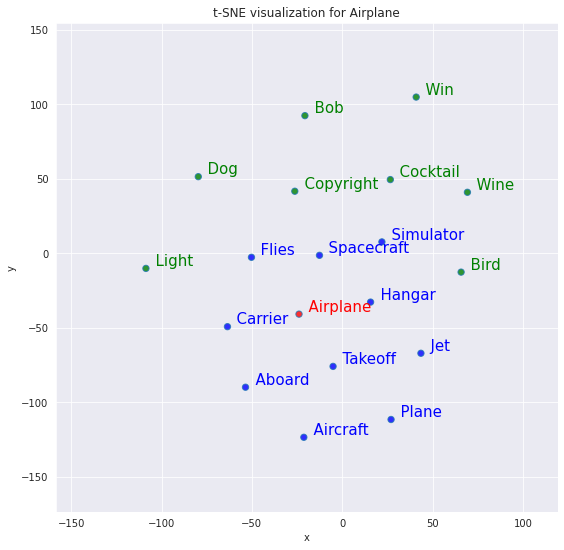

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'airplane', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


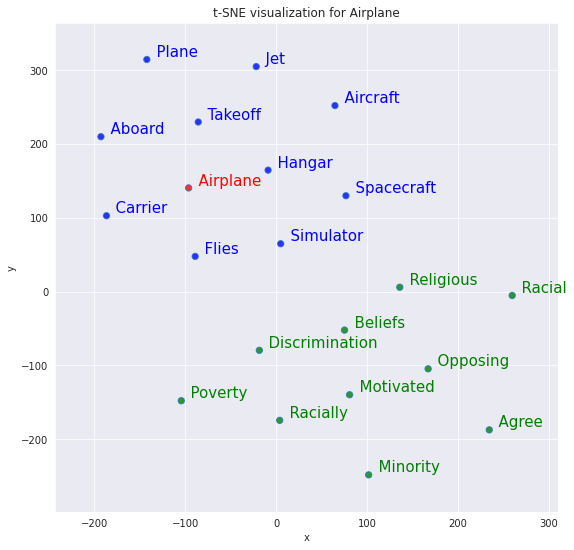

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'airplane', [i[0] for i in model.wv.most_similar(negative=["airplane"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "airplane", [t[0] for t in model.wv.most_similar(positive=["airplane"], topn=20)][10:])

### World-trade-center


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


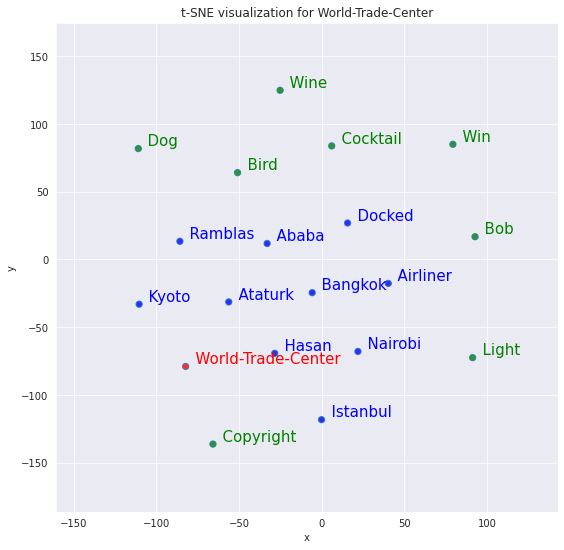

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'world-trade-center', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


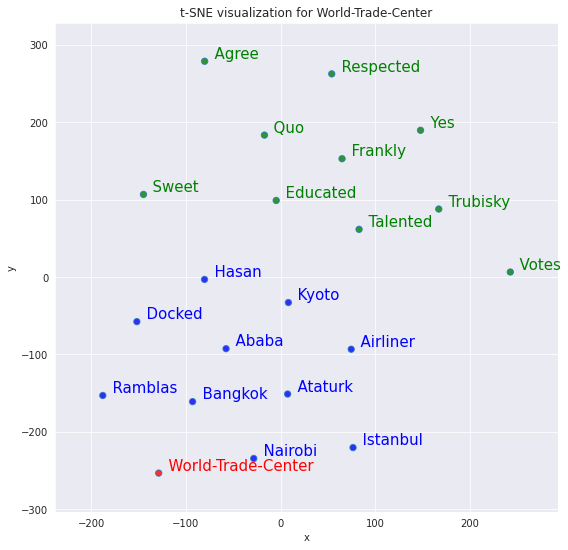

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'world-trade-center', [i[0] for i in model.wv.most_similar(negative=["world-trade-center"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "world-trade-center", [t[0] for t in model.wv.most_similar(positive=["world-trade-center"], topn=20)][10:])

### Jihad

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


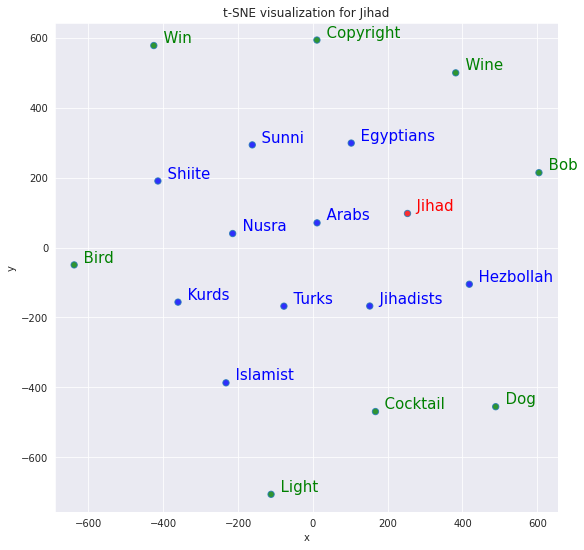

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'jihad', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


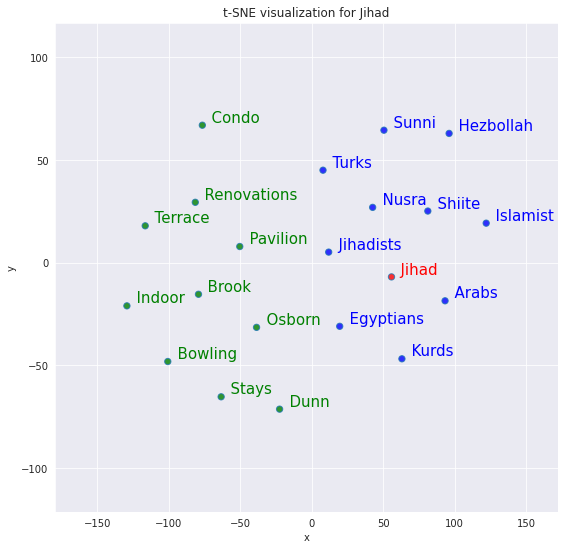

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'jihad', [i[0] for i in model.wv.most_similar(negative=["jihad"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "jihad", [t[0] for t in model.wv.most_similar(positive=["jihad"], topn=20)][10:])

## Most similar words to a list of words

In [ ]:
keys = ['terrorism', 'airplane', 'world-trade-center'] # twin-towers not in vocabulary


embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


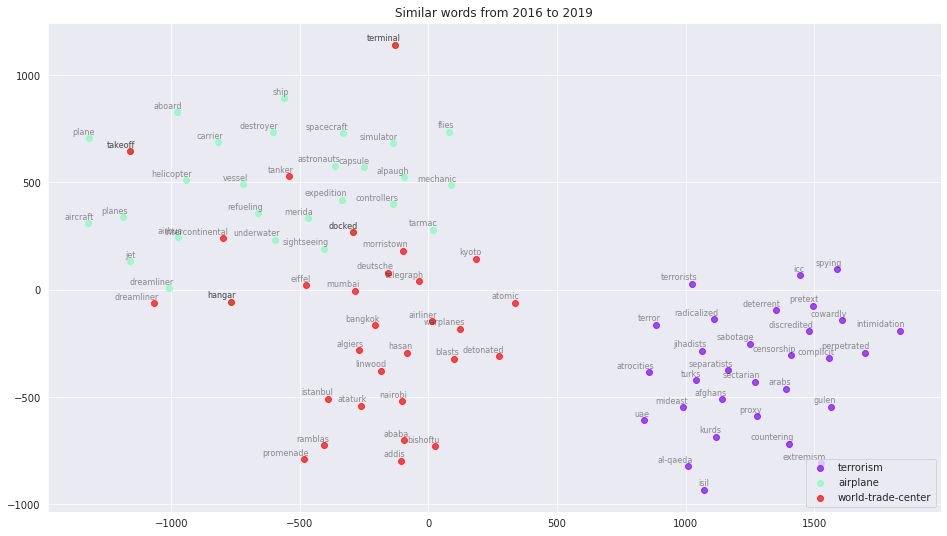

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 2016 to 2019', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_2016-19.png')

# Save text file for CADE

In [ ]:
listw2v = list(support_dict.values())

with open("file1619.txt", "w") as output:
  for i in range(len(listw2v)):
    for j in range(len(listw2v[i])):
      if j == 0:
        output.write("%s" % listw2v[i][j])
      else:
        output.write(" %s" % listw2v[i][j])
    output.write("\n")